In [1]:
!nvidia-smi

Mon May 31 17:00:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!rm -r /content/Face-Mask-Detection
!git clone https://github.com/balajisrinivas/Face-Mask-Detection.git

rm: cannot remove '/content/Face-Mask-Detection': No such file or directory
Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 3764, done.
remote: Total 3764 (delta 0), reused 0 (delta 0), pack-reused 3764
Receiving objects: 100% (3764/3764), 143.05 MiB | 36.68 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
import os
with_mask = list(os.listdir('/content/Face-Mask-Detection/dataset/with_mask'))
len(os.listdir('/content/Face-Mask-Detection/dataset/with_mask'))

1915

In [5]:
without_mask = list(os.listdir('/content/Face-Mask-Detection/dataset/without_mask'))
len(os.listdir('/content/Face-Mask-Detection/dataset/without_mask'))

1918

In [6]:
!rm -r /content/Dataset

os.mkdir("/content/Dataset")
os.mkdir("/content/Dataset/train/")
os.mkdir("/content/Dataset/val/")
os.mkdir("/content/Dataset/test/")

rm: cannot remove '/content/Dataset': No such file or directory


In [7]:
cats = ['without_mask', 'with_mask']

In [8]:
for i in cats:
  os.mkdir("/content/Dataset/train/"+i)
  os.mkdir("/content/Dataset/val/"+i)
  os.mkdir("/content/Dataset/test/"+i)

In [9]:
1915*0.75, 1915*0.2, 1915*0.05

(1436.25, 383.0, 95.75)

In [10]:
import shutil as sh
import cv2

for h,i in enumerate(without_mask):
  img = cv2.imread(f'/content/Face-Mask-Detection/dataset/without_mask/{i}')
  os.remove(f'/content/Face-Mask-Detection/dataset/without_mask/{i}')
  img = cv2.resize(img, (224, 224))
  cv2.imwrite(f'/content/Dataset/train/without_mask/{i}', img)
  # sh.move(f'/content/Face-Mask-Detection/dataset/without_mask/{i}', f'/content/Dataset/train/without_mask/{i}')
  if h == 1436:
    break

for h,i in enumerate(with_mask):
  img = cv2.imread(f'/content/Face-Mask-Detection/dataset/with_mask/{i}')
  os.remove(f'/content/Face-Mask-Detection/dataset/with_mask/{i}')
  img = cv2.resize(img, (224, 224))
  cv2.imwrite(f'/content/Dataset/train/with_mask/{i}', img)
  # sh.move(f'/content/Face-Mask-Detection/dataset/with_mask/{i}', f'/content/Dataset/train/with_mask/{i}')
  if h == 1436:
    break


In [11]:
with_mask = list(os.listdir('/content/Face-Mask-Detection/dataset/with_mask'))
without_mask = list(os.listdir('/content/Face-Mask-Detection/dataset/without_mask'))

for h,i in enumerate(without_mask):
  img = cv2.imread(f'/content/Face-Mask-Detection/dataset/without_mask/{i}')
  os.remove(f'/content/Face-Mask-Detection/dataset/without_mask/{i}')
  img = cv2.resize(img, (224, 224))
  cv2.imwrite(f'/content/Dataset/test/without_mask/{i}', img)
  # sh.move(f'/content/Face-Mask-Detection/dataset/without_mask/{i}', f'/content/Dataset/test/without_mask/{i}')
  if h == 383:
    break
for h,i in enumerate(with_mask):
  img = cv2.imread(f'/content/Face-Mask-Detection/dataset/with_mask/{i}')
  os.remove(f'/content/Face-Mask-Detection/dataset/with_mask/{i}')
  img = cv2.resize(img, (224, 224))
  cv2.imwrite(f'/content/Dataset/test/with_mask/{i}', img)
  # sh.move(f'/content/Face-Mask-Detection/dataset/with_mask/{i}', f'/content/Dataset/test/with_mask/{i}')
  if h == 383:
    break

In [12]:
with_mask = list(os.listdir('/content/Face-Mask-Detection/dataset/with_mask'))
without_mask = list(os.listdir('/content/Face-Mask-Detection/dataset/without_mask'))

for h,i in enumerate(without_mask):
  img = cv2.imread(f'/content/Face-Mask-Detection/dataset/without_mask/{i}')
  os.remove(f'/content/Face-Mask-Detection/dataset/without_mask/{i}')
  img = cv2.resize(img, (224, 224))
  cv2.imwrite(f'/content/Dataset/val/without_mask/{i}', img)
  # sh.move(f'/content/Face-Mask-Detection/dataset/without_mask/{i}', f'/content/Dataset/val/without_mask/{i}')
  # if h == 383:
  #   break
for h,i in enumerate(with_mask):
  img = cv2.imread(f'/content/Face-Mask-Detection/dataset/with_mask/{i}')
  os.remove(f'/content/Face-Mask-Detection/dataset/with_mask/{i}')
  img = cv2.resize(img, (224, 224))
  cv2.imwrite(f'/content/Dataset/val/with_mask/{i}', img)
  # sh.move(f'/content/Face-Mask-Detection/dataset/with_mask/{i}', f'/content/Dataset/val/with_mask/{i}')
  # if h == 383:
  #   break

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.1,
                                   horizontal_flip = True)
                                   
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True,
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory('/content/Dataset/val/',
                                            target_size = (224, 224),
                                            shuffle=True,
                                            batch_size = 16,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Dataset/test/',
                                            target_size = (224, 224),
                                            shuffle=True,
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 2874 images belonging to 2 classes.
Found 191 images belonging to 2 classes.
Found 768 images belonging to 2 classes.


# DenseNet121

29097984/29084464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 104s 227ms/step - loss: 1.1483 - accuracy: 0.8915 - val_loss: 0.3309 - val_accuracy: 0.9716
Epoch 2/10
179/179 [==============================] - 31s 176ms/step - loss: 0.2285 - accuracy: 0.9724 - val_loss: 0.3987 - val_accuracy: 0.9830
Epoch 3/10
179/179 [==============================] - 32s 177ms/step - loss: 0.3057 - accuracy: 0.9748 - val_loss: 0.3782 - val_accuracy: 0.9886
Epoch 4/10
179/179 [==============================] - 31s 176ms/step - loss: 0.3251 - accuracy: 0.9807 - val_loss: 0.7698 - val_accuracy: 0.9659
Epoch 5/10
179/179 [==============================] - 32s 176ms/step - loss: 0.3595 - accuracy: 0.9791 - val_loss: 0.3922 - val_accuracy: 0.9943
Epoch 6/10
179/179 [==============================] - 32s 176ms/step - loss: 0.1243 - accuracy: 0.9881 - val_loss: 0.3158 - val_accuracy: 0.9830
Epoch 7/10
179/179 [==============================] - 32s 176ms/step - loss: 0.1914 - accuracy: 0.9879 - val_loss: 0.4041 - val_a

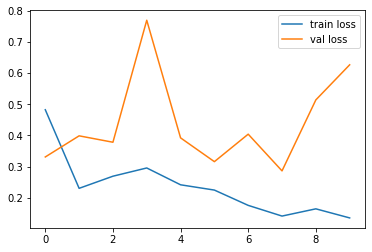

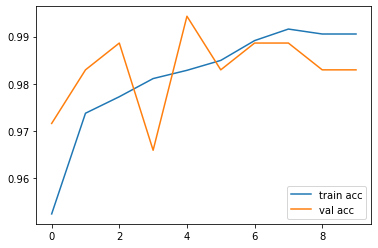

48/48 [==============================] - 3s 55ms/step - loss: 0.2084 - accuracy: 0.9922


In [14]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)

prediction = Dense(len(cats), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/DenseNet121.h5')

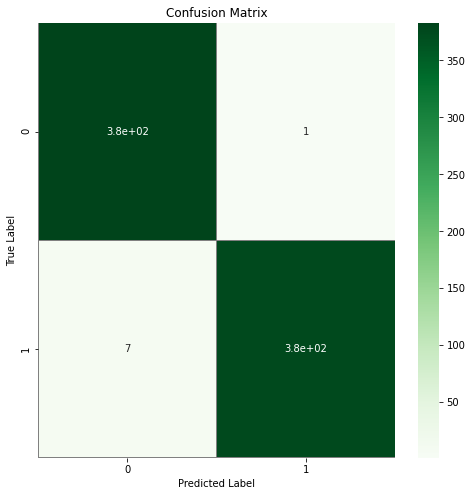

              precision    recall  f1-score   support

   with_mask       0.98      1.00      0.99       384
without_mask       1.00      0.98      0.99       384

    accuracy                           0.99       768
   macro avg       0.99      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768



In [15]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# InceptionV3

87924736/87910968 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 52s 214ms/step - loss: 0.5975 - accuracy: 0.9294 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/10
179/179 [==============================] - 31s 175ms/step - loss: 0.3718 - accuracy: 0.9759 - val_loss: 0.1526 - val_accuracy: 0.9948
Epoch 3/10
179/179 [==============================] - 31s 173ms/step - loss: 0.4508 - accuracy: 0.9804 - val_loss: 0.1752 - val_accuracy: 0.9895
Epoch 4/10
179/179 [==============================] - 31s 174ms/step - loss: 0.3787 - accuracy: 0.9816 - val_loss: 0.1109 - val_accuracy: 0.9948
Epoch 5/10
179/179 [==============================] - 31s 173ms/step - loss: 0.2286 - accuracy: 0.9843 - val_loss: 0.1168 - val_accuracy: 0.9948
Epoch 6/10
179/179 [==============================] - 31s 174ms/step - loss: 0.2394 - accuracy: 0.9884 - val_loss: 0.1528 - val_accuracy: 0.9948
Epoch 7/10
179/179 [==============================] - 31s 173ms/step - loss: 0.3234 - accuracy: 0.9900 - val_loss: 7.9354e-06 - va

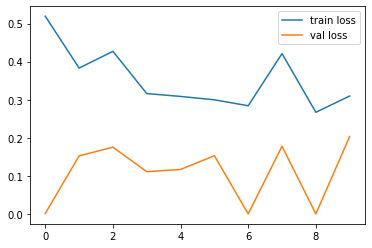

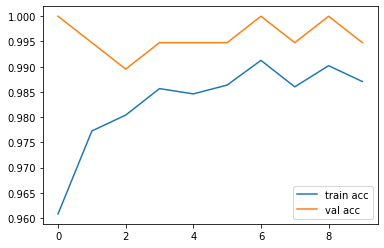

48/48 [==============================] - 2s 43ms/step - loss: 0.6734 - accuracy: 0.9870


In [16]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  # validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/InceptionV3.h5')

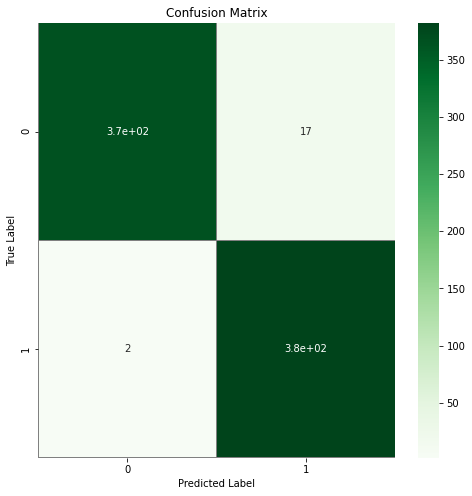

              precision    recall  f1-score   support

   with_mask       0.99      0.96      0.97       384
without_mask       0.96      0.99      0.98       384

    accuracy                           0.98       768
   macro avg       0.98      0.98      0.98       768
weighted avg       0.98      0.98      0.98       768



In [17]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# ResNet50V2

94683136/94668760 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 45s 195ms/step - loss: 0.6141 - accuracy: 0.9458 - val_loss: 0.5724 - val_accuracy: 0.9943
Epoch 2/10
179/179 [==============================] - 31s 174ms/step - loss: 0.1791 - accuracy: 0.9893 - val_loss: 0.4796 - val_accuracy: 0.9943
Epoch 3/10
179/179 [==============================] - 31s 174ms/step - loss: 0.2381 - accuracy: 0.9910 - val_loss: 1.4209 - val_accuracy: 0.9716
Epoch 4/10
179/179 [==============================] - 31s 174ms/step - loss: 0.7195 - accuracy: 0.9833 - val_loss: 0.5918 - val_accuracy: 0.9830
Epoch 5/10
179/179 [==============================] - 31s 174ms/step - loss: 0.1130 - accuracy: 0.9935 - val_loss: 4.7817e-07 - val_accuracy: 1.0000
Epoch 6/10
179/179 [==============================] - 31s 174ms/step - loss: 0.3150 - accuracy: 0.9921 - val_loss: 1.4103 - val_accuracy: 0.9886
Epoch 7/10
179/179 [==============================] - 32s 177ms/step - loss: 0.1466 - accuracy: 0.9947 - val_loss: 0.8920 - va

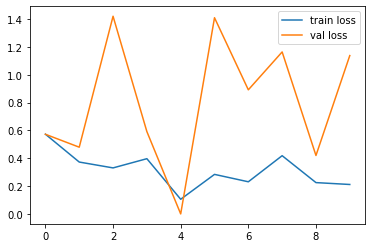

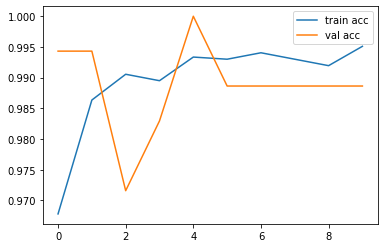

48/48 [==============================] - 2s 50ms/step - loss: 0.3433 - accuracy: 0.9896


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [18]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/ResNet50V2.h5')

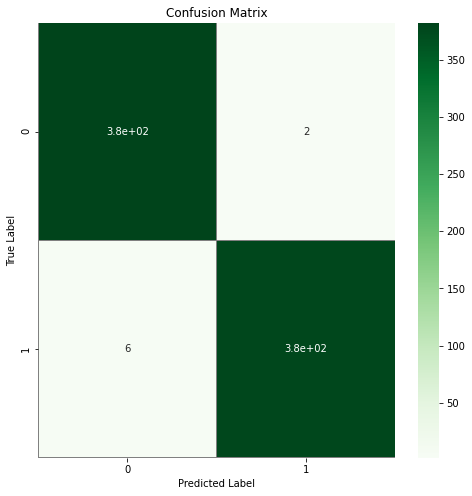

              precision    recall  f1-score   support

   with_mask       0.98      0.99      0.99       384
without_mask       0.99      0.98      0.99       384

    accuracy                           0.99       768
   macro avg       0.99      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768



In [19]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# InceptionResNetV2

219070464/219055592 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 83s 277ms/step - loss: 0.4947 - accuracy: 0.9386 - val_loss: 0.5721 - val_accuracy: 0.9773
Epoch 2/10
179/179 [==============================] - 35s 194ms/step - loss: 0.3199 - accuracy: 0.9747 - val_loss: 0.0661 - val_accuracy: 0.9830
Epoch 3/10
179/179 [==============================] - 35s 193ms/step - loss: 0.3655 - accuracy: 0.9836 - val_loss: 0.2473 - val_accuracy: 0.9943
Epoch 4/10
179/179 [==============================] - 35s 194ms/step - loss: 0.2030 - accuracy: 0.9854 - val_loss: 0.2787 - val_accuracy: 0.9886
Epoch 5/10
179/179 [==============================] - 35s 193ms/step - loss: 0.1987 - accuracy: 0.9875 - val_loss: 0.6503 - val_accuracy: 0.9830
Epoch 6/10
179/179 [==============================] - 35s 193ms/step - loss: 0.2442 - accuracy: 0.9870 - val_loss: 0.3145 - val_accuracy: 0.9886
Epoch 7/10
179/179 [==============================] - 35s 194ms/step - loss: 0.1344 - accuracy: 0.9935 - val_loss: 0.8509 - val_ac

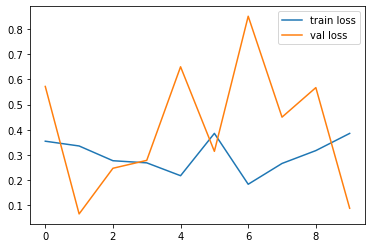

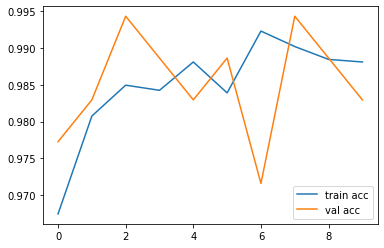

48/48 [==============================] - 5s 102ms/step - loss: 0.4452 - accuracy: 0.9870


In [20]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/InceptionResNetV2.h5')

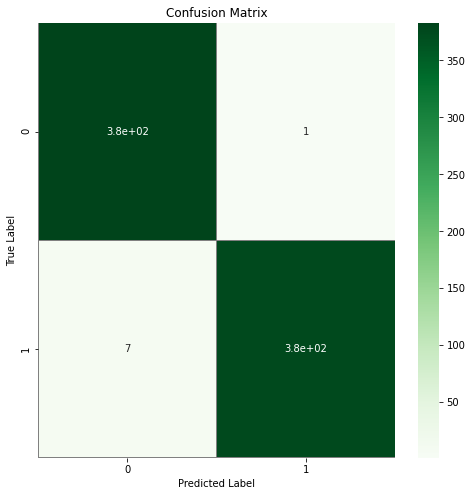

              precision    recall  f1-score   support

   with_mask       0.98      1.00      0.99       384
without_mask       1.00      0.98      0.99       384

    accuracy                           0.99       768
   macro avg       0.99      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768



In [21]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# Xception

83697664/83683744 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 41s 194ms/step - loss: 0.3584 - accuracy: 0.9449 - val_loss: 0.1690 - val_accuracy: 0.9943
Epoch 2/10
179/179 [==============================] - 32s 177ms/step - loss: 0.2066 - accuracy: 0.9865 - val_loss: 0.2552 - val_accuracy: 0.9830
Epoch 3/10
179/179 [==============================] - 31s 175ms/step - loss: 0.4433 - accuracy: 0.9800 - val_loss: 0.4915 - val_accuracy: 0.9943
Epoch 4/10
179/179 [==============================] - 32s 180ms/step - loss: 0.1964 - accuracy: 0.9913 - val_loss: 0.2837 - val_accuracy: 0.9943
Epoch 5/10
179/179 [==============================] - 32s 178ms/step - loss: 0.0965 - accuracy: 0.9936 - val_loss: 0.2694 - val_accuracy: 0.9943
Epoch 6/10
179/179 [==============================] - 32s 176ms/step - loss: 0.1256 - accuracy: 0.9927 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
179/179 [==============================] - 32s 176ms/step - loss: 0.1455 - accuracy: 0.9938 - val_loss: 0.0853 - va

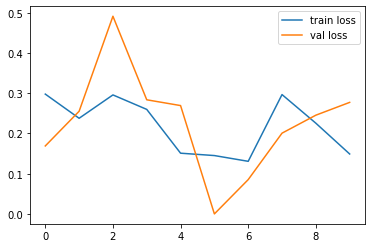

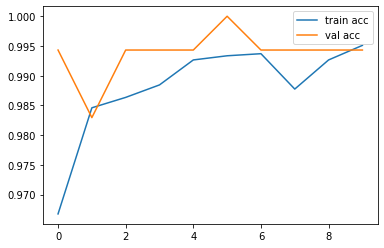

48/48 [==============================] - 3s 68ms/step - loss: 0.4214 - accuracy: 0.9909


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [22]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten  
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/Xception.h5')

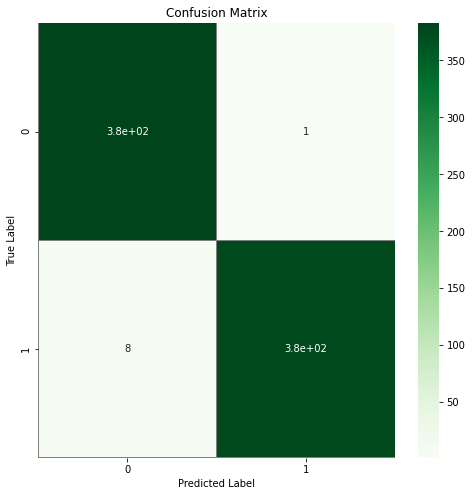

              precision    recall  f1-score   support

   with_mask       0.98      1.00      0.99       384
without_mask       1.00      0.98      0.99       384

    accuracy                           0.99       768
   macro avg       0.99      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768



In [23]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# MobileNetV2

9420800/9406464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 39s 177ms/step - loss: 0.6564 - accuracy: 0.9365 - val_loss: 0.3781 - val_accuracy: 0.9830
Epoch 2/10
179/179 [==============================] - 29s 160ms/step - loss: 0.8856 - accuracy: 0.9564 - val_loss: 0.4871 - val_accuracy: 0.9830
Epoch 3/10
179/179 [==============================] - 29s 160ms/step - loss: 0.6193 - accuracy: 0.9723 - val_loss: 0.2912 - val_accuracy: 0.9830
Epoch 4/10
179/179 [==============================] - 28s 159ms/step - loss: 0.6110 - accuracy: 0.9746 - val_loss: 0.3472 - val_accuracy: 0.9773
Epoch 5/10
179/179 [==============================] - 29s 160ms/step - loss: 0.4408 - accuracy: 0.9805 - val_loss: 0.3305 - val_accuracy: 0.9773
Epoch 6/10
179/179 [==============================] - 28s 159ms/step - loss: 0.5231 - accuracy: 0.9809 - val_loss: 0.5669 - val_accuracy: 0.9830
Epoch 8/10
179/179 [==============================] - 29s 160ms/step - loss: 0.4222 - accuracy: 0.9867 - val_loss: 0.3161 - val_ac

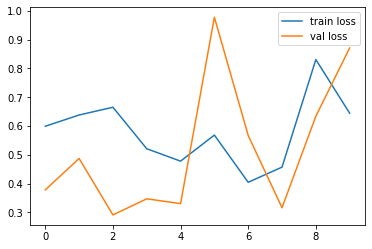

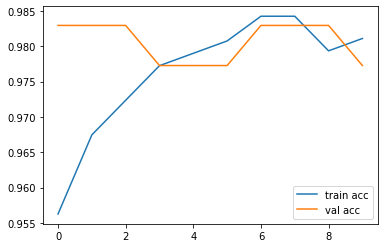

48/48 [==============================] - 2s 32ms/step - loss: 0.2664 - accuracy: 0.9909


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/MobileNetV2.h5')

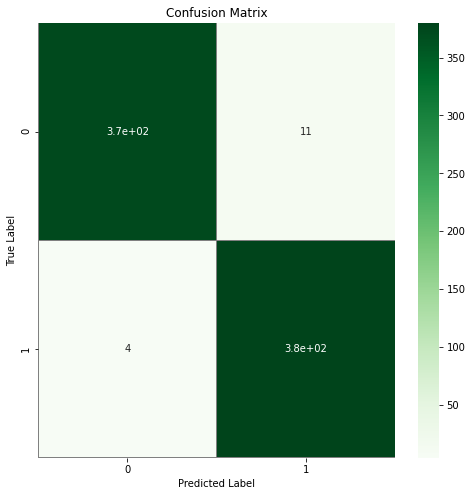

              precision    recall  f1-score   support

   with_mask       0.99      0.97      0.98       384
without_mask       0.97      0.99      0.98       384

    accuracy                           0.98       768
   macro avg       0.98      0.98      0.98       768
weighted avg       0.98      0.98      0.98       768



In [25]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# VGG19

80150528/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 40s 194ms/step - loss: 0.6508 - accuracy: 0.7523 - val_loss: 0.1432 - val_accuracy: 0.9375
Epoch 2/10
179/179 [==============================] - 32s 177ms/step - loss: 0.1571 - accuracy: 0.9416 - val_loss: 0.1539 - val_accuracy: 0.9602
Epoch 3/10
179/179 [==============================] - 32s 178ms/step - loss: 0.1315 - accuracy: 0.9533 - val_loss: 0.1168 - val_accuracy: 0.9602
Epoch 4/10
179/179 [==============================] - 33s 185ms/step - loss: 0.1700 - accuracy: 0.9323 - val_loss: 0.1832 - val_accuracy: 0.9659
Epoch 5/10
179/179 [==============================] - 32s 178ms/step - loss: 0.1304 - accuracy: 0.9511 - val_loss: 0.1118 - val_accuracy: 0.9773
Epoch 6/10
179/179 [==============================] - 32s 178ms/step - loss: 0.1062 - accuracy: 0.9573 - val_loss: 0.1278 - val_accuracy: 0.9773
Epoch 7/10
179/179 [==============================] - 32s 177ms/step - loss: 0.1325 - accuracy: 0.9561 - val_loss: 0.0892 - val_ac

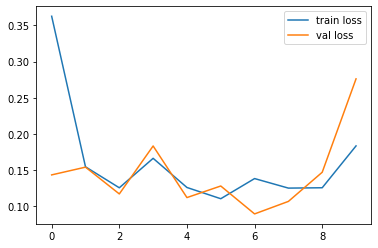

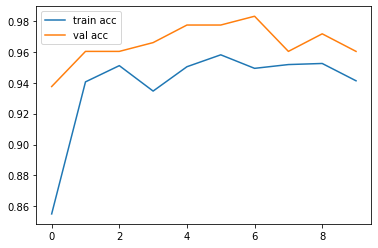

48/48 [==============================] - 4s 82ms/step - loss: 0.1094 - accuracy: 0.9792


In [26]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/VGG19.h5')

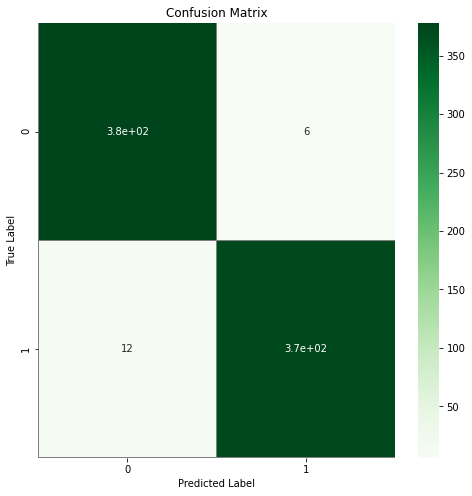

              precision    recall  f1-score   support

   with_mask       0.97      0.98      0.98       384
without_mask       0.98      0.97      0.98       384

    accuracy                           0.98       768
   macro avg       0.98      0.98      0.98       768
weighted avg       0.98      0.98      0.98       768



In [27]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# VGG16

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
179/179 [==============================] - 33s 177ms/step - loss: 0.6066 - accuracy: 0.7666 - val_loss: 0.1348 - val_accuracy: 0.9375
Epoch 2/10
179/179 [==============================] - 31s 175ms/step - loss: 0.1483 - accuracy: 0.9380 - val_loss: 0.1840 - val_accuracy: 0.9318
Epoch 3/10
179/179 [==============================] - 32s 180ms/step - loss: 0.1547 - accuracy: 0.9422 - val_loss: 0.0854 - val_accuracy: 0.9659
Epoch 4/10
179/179 [==============================] - 31s 174ms/step - loss: 0.1411 - accuracy: 0.9554 - val_loss: 0.1059 - val_accuracy: 0.9602
Epoch 5/10
179/179 [==============================] - 31s 174ms/step - loss: 0.0901 - accuracy: 0.9696 - val_loss: 0.1088 - val_accuracy: 0.9716
Epoch 6/10
179/179 [==============================] - 31s 174ms/step - loss: 0.1093 - accuracy: 0.9571 - val_loss: 0.0756 - val_accuracy: 0.9716
Epoch 7/10
179/179 [==============================] - 31s 174ms/step - loss: 0.1010 - accuracy: 0.9567 - val_loss: 0.1291 - val_ac

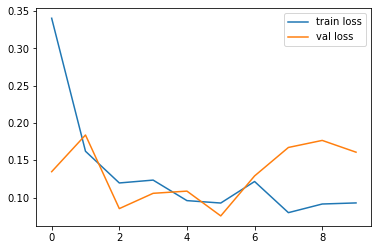

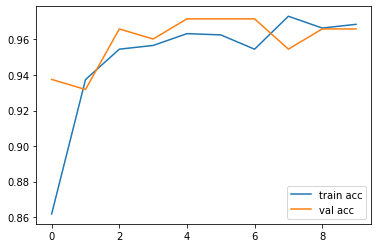

48/48 [==============================] - 3s 68ms/step - loss: 0.0948 - accuracy: 0.9818


In [28]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 10)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/VGG16.h5')

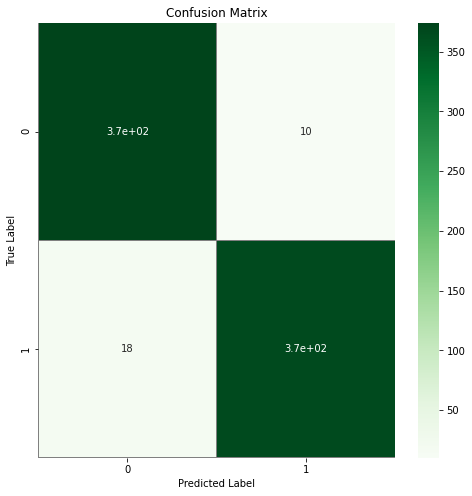

              precision    recall  f1-score   support

   with_mask       0.95      0.97      0.96       384
without_mask       0.97      0.95      0.96       384

    accuracy                           0.96       768
   macro avg       0.96      0.96      0.96       768
weighted avg       0.96      0.96      0.96       768



In [29]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))

# MobileNetV2

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
179/179 [==============================] - 39s 180ms/step - loss: 0.7939 - accuracy: 0.9055 - val_loss: 0.6139 - val_accuracy: 0.9659
Epoch 2/5
179/179 [==============================] - 29s 163ms/step - loss: 0.9767 - accuracy: 0.9574 - val_loss: 0.2960 - val_accuracy: 0.9716
Epoch 3/5
179/179 [==============================] - 29s 163ms/step - loss: 0.7343 - accuracy: 0.9691 - val_loss: 0.3483 - val_accuracy: 0.9886
Epoch 4/5
179/179 [==============================] - 29s 164ms/step - loss: 0.4221 - accuracy: 0.9824 - val_loss: 0.1696 - val_accuracy: 0.9886
Epoch 5/5
179/179 [==============================] - 29s 164ms/step - loss: 0.3779 - accuracy: 0.9838 - val_loss: 0.6939 - val_accuracy: 0.9830


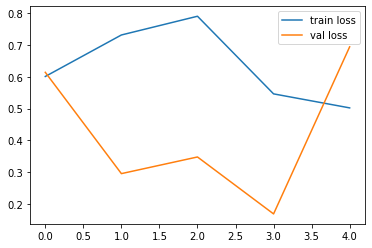

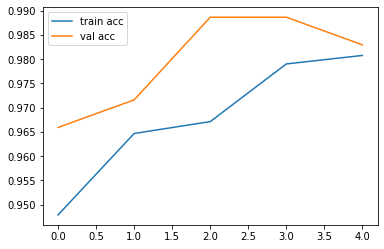

48/48 [==============================] - 2s 34ms/step - loss: 0.2936 - accuracy: 0.9857


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [36]:
#@title

import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# add preprocessing layer to the front of VGG
vgg = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# useful for getting number of classes
folders = glob('/content/Dataset/train/*')
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax', name='predictions')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
# model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

# fit the model
r1 = model.fit_generator(
  training_set,
  steps_per_epoch = training_set.samples // 16,
  validation_data = valid_set, 
  validation_steps = valid_set.samples // 16,
  epochs = 5)

# loss
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.evaluate(test_set, batch_size=16)

model.save('/content/MobileNetV2.h5')

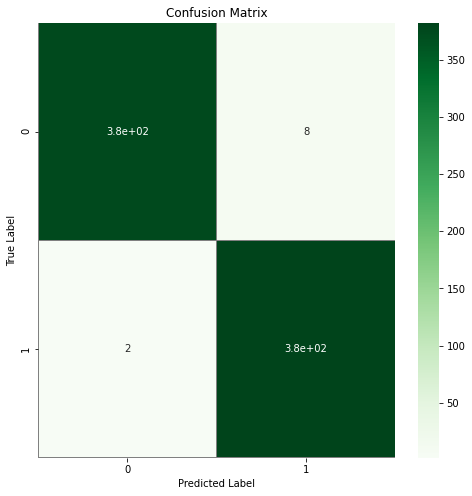

              precision    recall  f1-score   support

   with_mask       0.99      0.98      0.99       384
without_mask       0.98      0.99      0.99       384

    accuracy                           0.99       768
   macro avg       0.99      0.99      0.99       768
weighted avg       0.99      0.99      0.99       768



In [37]:
#@title
import cv2
import numpy as np

images = []
true = []
for i in os.listdir("/content/Dataset/test"):
  for j in os.listdir("/content/Dataset/test/"+i):
    image = cv2.imread(os.path.join("/content/Dataset/test",i,j))
    images.append(image)
    true.append(i)

pred = model.predict(np.array(images).reshape((768 , 224, 224, 3))/255.0)

targets = cats[::-1]
result = []
for i in range(0, pred.shape[0]):
  result.append(targets[np.argmax(pred[i])])

import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(true, result) 
# print(confusion_mtx)
# plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(true, result))